In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'data/train'
valid_path = 'data/test'

In [3]:
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in res.layers:
  layer.trainable = False
  

In [5]:
folders = glob('data/train/*')
folders

['data/train\\A',
 'data/train\\B',
 'data/train\\C',
 'data/train\\D',
 'data/train\\E',
 'data/train\\F',
 'data/train\\G',
 'data/train\\H',
 'data/train\\I',
 'data/train\\J',
 'data/train\\K',
 'data/train\\L',
 'data/train\\M',
 'data/train\\N',
 'data/train\\O',
 'data/train\\P',
 'data/train\\Q',
 'data/train\\R',
 'data/train\\S',
 'data/train\\T',
 'data/train\\U',
 'data/train\\V',
 'data/train\\W',
 'data/train\\X',
 'data/train\\Y',
 'data/train\\Z']

In [6]:
x = Flatten()(res.output)
prediction = Dense(len(folders), activation='softmax')(x)


In [7]:
model = Model(inputs=res.input, outputs=prediction)

In [8]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 12380 images belonging to 26 classes.
Found 4612 images belonging to 26 classes.


In [12]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
387/387 [==============================] - 1000s 3s/step - loss: 0.6214 - accuracy: 0.9125 - val_loss: 0.4945 - val_accuracy: 0.9300
Epoch 2/5
387/387 [==============================] - 988s 3s/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.5977 - val_accuracy: 0.9297
Epoch 3/5
387/387 [==============================] - 990s 3s/step - loss: 0.0979 - accuracy: 0.9785 - val_loss: 0.8213 - val_accuracy: 0.9328
Epoch 4/5
387/387 [==============================] - 989s 3s/step - loss: 0.0777 - accuracy: 0.9834 - val_loss: 1.4722 - val_accuracy: 0.9131
Epoch 5/5
387/387 [==============================] - 981s 3s/step - loss: 0.0269 - accuracy: 0.9934 - val_loss: 1.1579 - val_accuracy: 0.9341


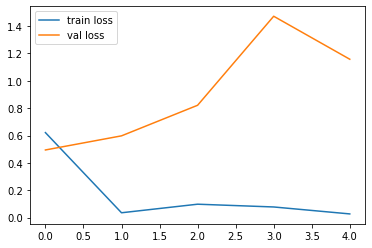

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

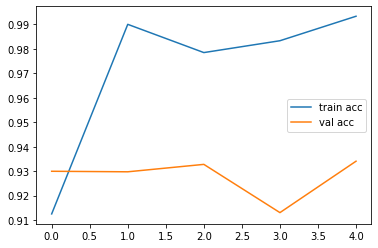

<Figure size 432x288 with 0 Axes>

In [15]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')